<center>
<h1 style="color: #007BC4;">Curso de programación con Python</h1> 
<h3 style="color: #333333;">Tema 11: Gráficas - Matplotlib: boxplots</h3> 
</center>
<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Boxplot

Un¡ `boxplot` es una forma de representar estadisticamente la _distribución_ de los datos mediante cinco dimensiones principales:

-   **Minimo:** El número mas pequeño del conjunto de datos
-   **Primer Cuartil:** El número del medio entre el `minimo` y la `mediana`
-   **Segundo Cuartil (Mediana):** El número en la mitad del conjunto de datos
-   **Tercer Cuartil:** El número del medio entre la `mediana` y el `máximo`
-   **Máximo:** El número mas grande del conjunto

<img src="img/boxplot.png" width="400">


## Ejemplo de boxplot

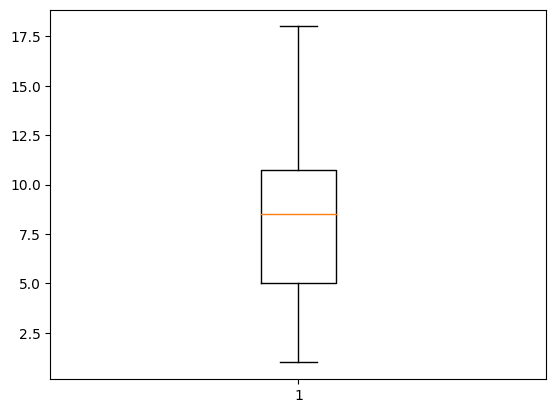

In [2]:
x = np.random.randint(low=0, high=20, size=20)
x.sort()

plt.boxplot(x)
plt.show()

#### Añadimos un valor alto para ver el efecto
The top whisker gets elongated to include the new data. The box and the median should also change slightly

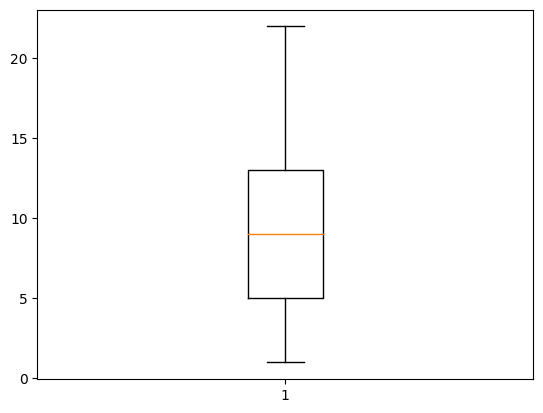

In [3]:
x = np.append(x, 22)
plt.boxplot(x) 
plt.show()

#### Añadimos valores mucho más altos para ver el efecto

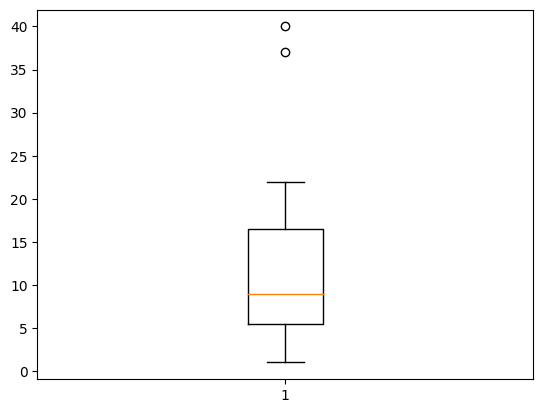

In [4]:
x = np.append(x, 37)
x = np.append(x, 40)

plt.boxplot(x) 

plt.show()

### Se puede cambiar la orientación

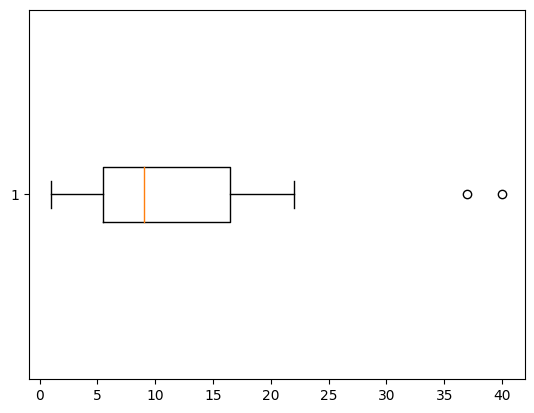

In [5]:
plt.boxplot(x, vert=False) 
plt.show()

### Se puede añadir una muesca para destacar la mediana

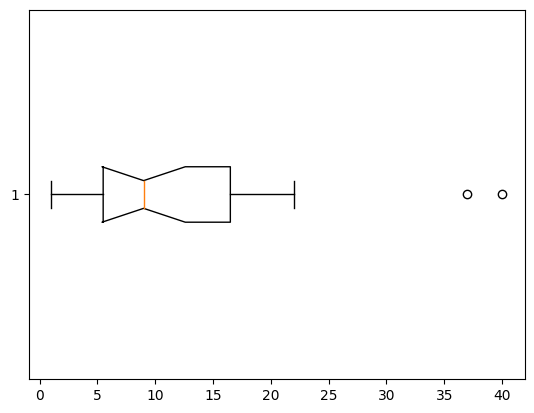

In [6]:
plt.boxplot(x, 
            vert=False,
            notch=True) 

plt.show()

### Formateando el boxplot

Por defecto es un objeto Line2D y las opciones de formateo son limitadas pero se puede convetir a un objeto PathPatch fijando el parámetro <code>patch_artist=True</code>.

Más información sobre objetos PathPatch:
https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.PathPatch.html?highlight=pathpatch#matplotlib.patches.PathPatch

{'whiskers': [<matplotlib.lines.Line2D at 0x110d33d90>,
 'caps': [<matplotlib.lines.Line2D at 0x110d30af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x110d33f40>],
 'medians': [<matplotlib.lines.Line2D at 0x110d32c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x110d33670>],
 'means': []}

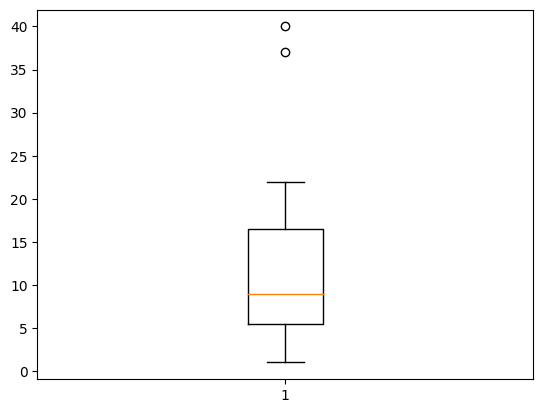

In [7]:
bp = plt.boxplot(x)
bp

{'whiskers': [<matplotlib.lines.Line2D at 0x110dbb670>,
 'caps': [<matplotlib.lines.Line2D at 0x110dbbbb0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x110dbb2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x110de8100>],
 'fliers': [<matplotlib.lines.Line2D at 0x110de83a0>],
 'means': []}

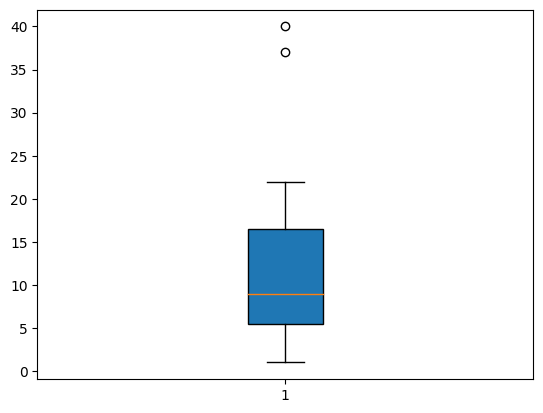

In [8]:
bp = plt.boxplot(x, patch_artist=True) 
bp

#### Ver el número de elementos del boxplot

In [9]:
print('Number of boxes: ', len(bp['boxes']))
print('Number of whiskers: ', len(bp['whiskers']))
print('Number of caps: ', len(bp['caps']))
print('Number of medians: ', len(bp['medians']))
print('Number of fliers: ', len(bp['fliers']))

Number of boxes:  1
Number of whiskers:  2
Number of caps:  2
Number of medians:  1
Number of fliers:  1


#### Cambiar el color de la caja

[None, None, None]

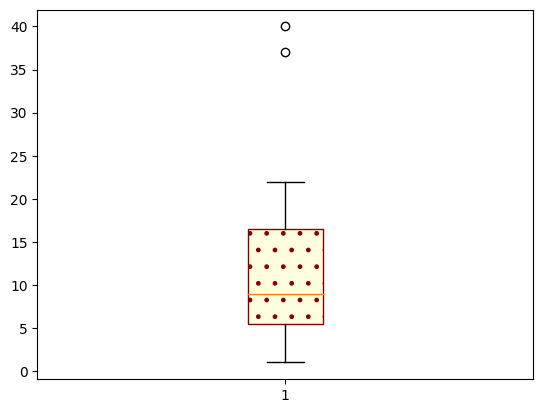

In [10]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='.')

#### Configurar los "whiskers"
Whisker #0 es el inferior, #1 el superior

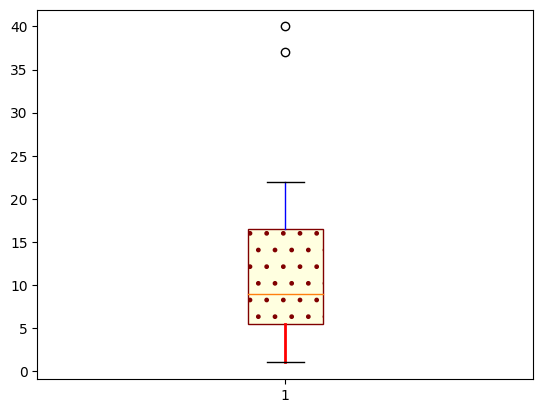

In [11]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='.')

bp['whiskers'][0].set(color='red', 
                      linewidth=2)

bp['whiskers'][1].set(color='blue')

plt.show()

#### Configurar las "caps"
Caps son las líneas horizontales al final de los whiskers. Cap #0 está al final del whisker #0 and cap #1 al final del whisker #1

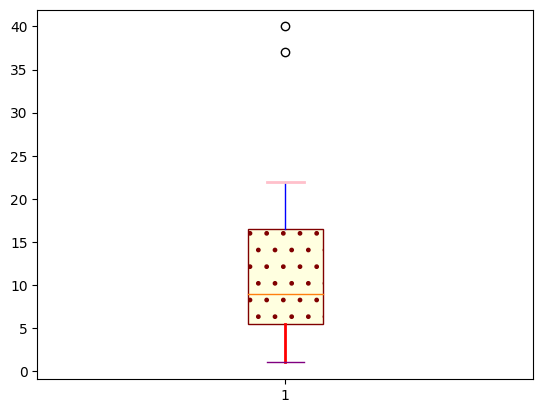

In [12]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='.')

bp['whiskers'][0].set(color='red', 
                      linewidth=2)

bp['whiskers'][1].set(color='blue')

bp['caps'][0].set(color='purple')

bp['caps'][1].set(color='pink',
                  linewidth=2)

plt.show()

#### Configurar los "outlier"
Outliers se llaman "fliers" en los boxplots y también se pueden formatear

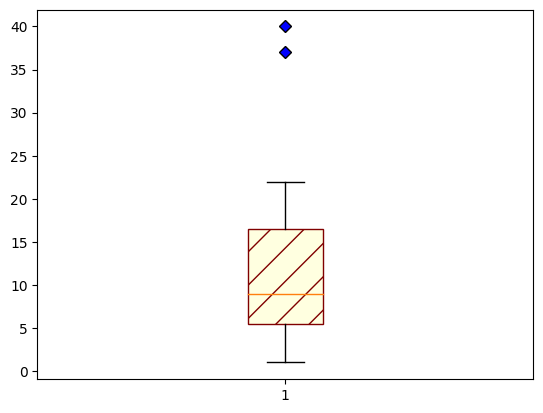

In [13]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='/')

bp['fliers'][0].set(marker='D', 
                    markerfacecolor='blue')

plt.show()

#### Configurar la línea de la mediana

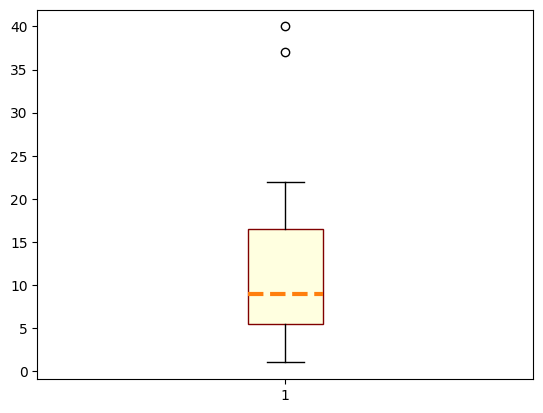

In [14]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon')

bp['medians'][0].set(linestyle='--', 
                     linewidth=3)

plt.show()

### Uso con un conjunto real
<b>Fuente de los datos: </b>http://roycekimmons.com/system/generate_data.php?dataset=exams&n=100 

#### Cargamos el conjunto de datos con pandas:

In [15]:
import pandas as pd
exam_data = pd.read_csv('datasets/exams.csv')
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,free/reduced,none,69,61,58
1,female,group C,some college,free/reduced,completed,47,65,69
2,male,group A,high school,standard,none,66,52,53
3,male,group B,some college,standard,none,88,89,82
4,female,group C,master's degree,free/reduced,none,62,82,76


#### Extraemos las notas de los exámenes

In [16]:
exam_scores = exam_data[['math score', 'reading score', 'writing score']]
exam_scores.head()

,math score,reading score,writing score
0,69,61,58
1,47,65,69
2,66,52,53
3,88,89,82
4,62,82,76


Lo convertimos a un array numpy para usarlo en la gráfica

In [17]:
exam_scores_array = np.array(exam_scores)
exam_scores_array

array([[ 69,  61,  58],
       [ 47,  65,  69],
       [ 66,  52,  53],
       [ 88,  89,  82],
       [ 62,  82,  76],
       [ 47,  69,  60],
       [ 71,  66,  74],
       [ 57,  62,  60],
       [ 60,  67,  65],
       [ 74,  72,  76],
       [ 77,  71,  67],
       [ 69,  79,  83],
       [ 65,  62,  56],
       [ 55,  58,  51],
       [ 78,  88,  91],
       [ 70,  72,  72],
       [ 55,  69,  55],
       [ 68,  68,  62],
       [ 73,  62,  58],
       [ 54,  50,  51],
       [ 81,  76,  77],
       [ 70,  76,  73],
       [ 64,  62,  63],
       [ 51,  66,  63],
       [ 49,  50,  43],
       [ 83,  80,  82],
       [ 86,  92,  81],
       [ 83,  89,  94],
       [ 61,  77,  68],
       [ 55,  50,  44],
       [ 56,  59,  55],
       [ 46,  57,  61],
       [ 68,  60,  52],
       [ 78,  75,  69],
       [ 85,  94,  93],
       [ 95,  99,  95],
       [ 82,  74,  78],
       [ 94,  85,  96],
       [ 64,  71,  68],
       [ 70,  80,  85],
       [ 84,  78,  84],
       [ 62,  81

#### Dibujamos un boxplot para representar la notas

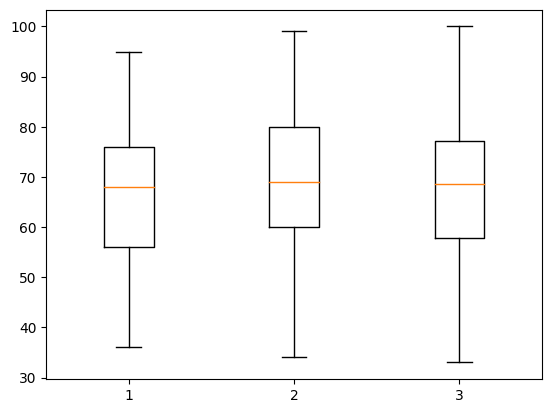

In [18]:
bp = plt.boxplot(exam_scores_array)

plt.show()

#### Componentes del boxplot

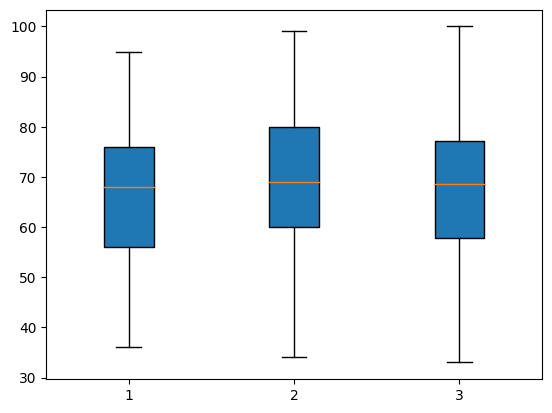

In [19]:
bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True)

In [20]:
print('Number of boxes: ', len(bp['boxes']))
print('Number of whiskers: ', len(bp['whiskers']))
print('Number of caps: ', len(bp['caps']))
print('Number of medians: ', len(bp['medians']))
print('Number of fliers: ', len(bp['fliers']))

Number of boxes:  3
Number of whiskers:  6
Number of caps:  6
Number of medians:  3
Number of fliers:  3


### Formateando el boxplot

#### The colors to use for the boxes

In [21]:
colors = ['blue', 'grey', 'lawngreen']

#### Dando formato a las cajas y los "caps" superiores

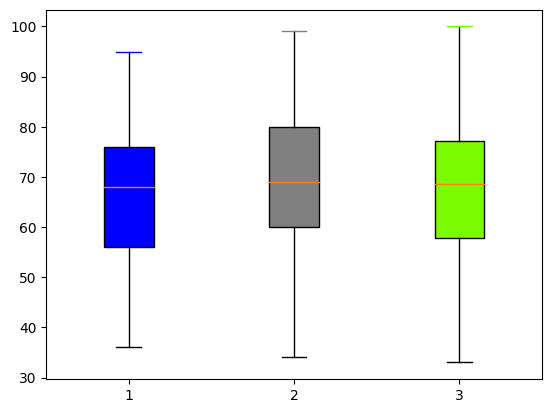

In [22]:
bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])

#### Fijando una etiqueta para los xticks

([<matplotlib.axis.XTick at 0x11d1fdf00>,
 [Text(1, 0, 'Math'), Text(2, 0, 'Reading'), Text(3, 0, 'Writing')])

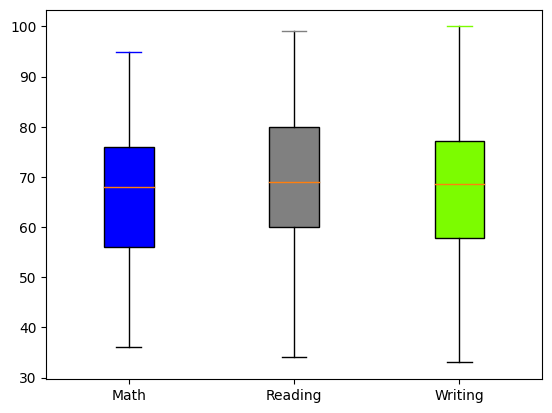

In [23]:
bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([1, 2, 3], ['Math', 'Reading', 'Writing'])